In [1]:
import sys
import time

import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import time
import csv



In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

METRICS = [
	keras.metrics.TruePositives(name='tp'),
	keras.metrics.FalsePositives(name='fp'),
	keras.metrics.TrueNegatives(name='tn'),
	keras.metrics.FalseNegatives(name='fn'),
	keras.metrics.BinaryAccuracy(name='accuracy'),
	keras.metrics.Precision(name='precision'),
	keras.metrics.Recall(name='recall'),
	keras.metrics.AUC(name='auc'),
	keras.metrics.AUC(name='prc', curve='PR'),  # precision-recall curve
]

In [3]:
def plot_loss(history, label, n):
	# Use a log scale on y-axis to show the wide range of values.
	plt.semilogy(history.epoch, history.history['loss'],
			   color=colors[n], label='Train ' + label)
	plt.semilogy(history.epoch, history.history['val_loss'],
			   color=colors[n], label='Val ' + label,
			   linestyle="--")
	plt.xlabel('Epoch')
	plt.ylabel('Loss')
	plt.legend()


def plot_metrics(history):
	metrics = ['loss', 'prc', 'precision', 'recall']
	for n, metric in enumerate(metrics):
		name = metric.replace("_", " ").capitalize()
		plt.subplot(2, 2, n + 1)
		plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
		plt.plot(history.epoch, history.history['val_' + metric],
				 color=colors[0], linestyle="--", label='Val')
		plt.xlabel('Epoch')
		plt.ylabel(name)
		if metric == 'loss':
			plt.ylim([0, plt.ylim()[1]])
		elif metric == 'auc':
			plt.ylim([0.8, 1.1])
		else:
			plt.ylim([0, 1.1])

		plt.legend();

def plot_cm(labels, predictions, title, p=0.5):
	cm = confusion_matrix(labels, predictions > p)
	plt.figure(figsize=(5, 5))
	sns.heatmap(cm, annot=True, fmt="d")
	# plt.title('Confusion matrix @{:.2f}'.format(p))
	plt.title(title)
	plt.ylabel('Actual label')
	plt.xlabel('Predicted label')

	print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
	print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
	print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
	print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
	print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [4]:
dataset_path = 'tensorflow_group_datasets/one_res_small/0_no_leaks_rand_base_demand/'

out_filename = '1M_one_res_small_leaks_ordered_group_0_node_0_0164_merged.csv'
raw_df1 = pd.read_csv(dataset_path+out_filename, delimiter=";")



In [5]:
EPOCHS = 100
BATCH_SIZE = 2048


In [6]:

leak_area = "0164" # "0246" #"0164"
# 1-->7 2-->7 3-->6 4-->2 5-->1 6-->7 7-->7
leak_group = 3
leak_group_model = 7

dataset_path = "tensorflow_group_datasets/model/h5/"
model_filename = "model_leak_group"+str(leak_group)+"_train_node_"+str(leak_group_model)+".h5"
loaded_model = tf.keras.models.load_model(dataset_path+model_filename)

# tf.keras.utils.plot_model(loaded_model, to_file='model_plot.png', show_shapes=True)

# tf.keras.utils.plot_model(
#     loaded_model,
#     to_file='tensorflow_group_datasets/model_plot.png',
#     show_shapes=True,
#     show_dtype=False,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=False,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=False,
# )


leak node :  1
Examples:
    Total: 107520
    Positive: 6720 (6.25% of total)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
loss :  0.22949478030204773
accuracy :  0.9397786259651184
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warnin

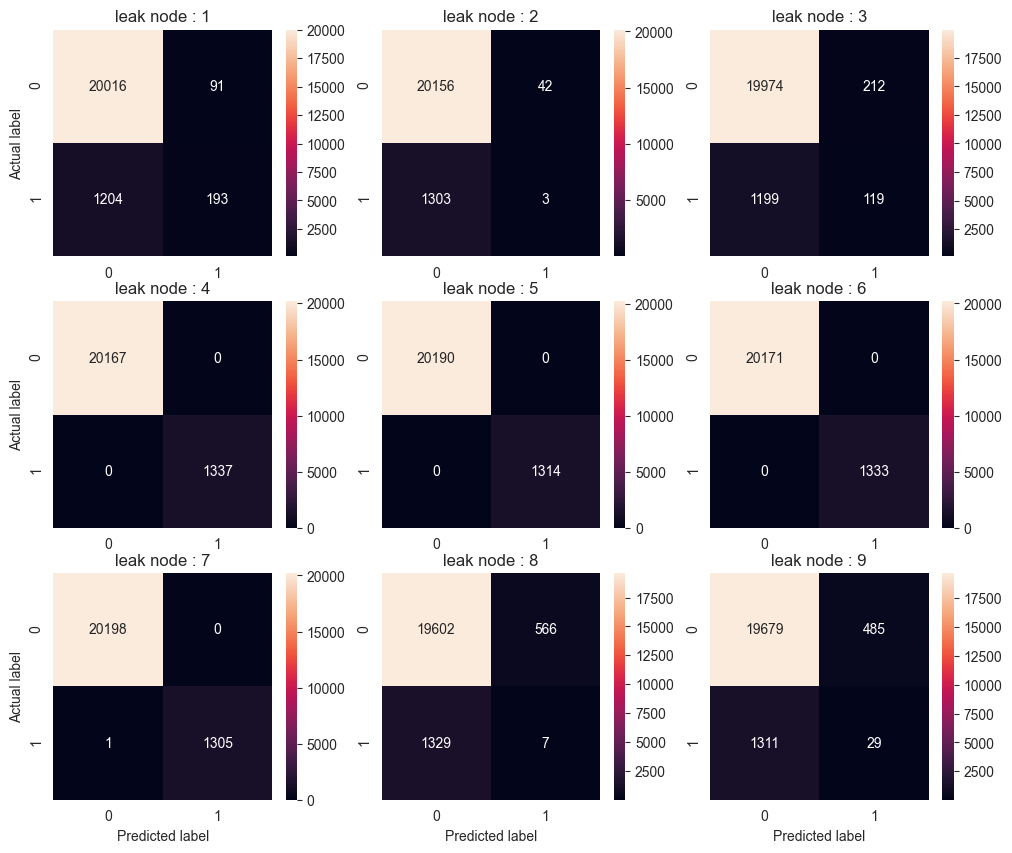

In [14]:
leak_area = "0164" # "0246" #"0164"
# 1-->7 2-->7 3-->6 4-->2 5-->1 6-->7 7-->7
leak_group = 7
leak_group_model = 7

dataset_path = "tensorflow_group_datasets/model/h5/"
model_filename = "model_leak_group"+str(leak_group)+"_train_node_"+str(leak_group_model)+".h5"
loaded_model = tf.keras.models.load_model(dataset_path+model_filename)

dataset_path = 'tensorflow_group_datasets/one_res_small/1_at_82_leaks_rand_base_demand/'

# plt.figure(figsize=(5, 5))
fig = plt.figure()


for leak_node in range(1,10,1):
	print("leak node : ", leak_node)
	out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
	raw_df2 = pd.read_csv(dataset_path+out_filename, delimiter=";")

    # Appending multiple DataFrame
	raw_df = pd.concat([raw_df1, raw_df2])
	raw_df.reset_index(drop=True, inplace=True)

	cleaned_df = raw_df.copy()
	pop_col = ['hour', 'nodeID', 'node_type', 'leak_area_value', 'leak_discharge_value', 'leak_demand_value', 'has_leak' ]

	cleaned_df = cleaned_df.drop(pop_col, axis=1)
	cleaned_df.rename(columns = {'leak_group':'Class'}, inplace = True)

	#%%
	neg, pos = np.bincount(cleaned_df['Class'])
	total = neg + pos
	print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
		total, pos, 100 * pos / total))

	#%%
	# Use a utility from sklearn to split and shuffle your dataset.
	train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
	train_df, val_df = train_test_split(train_df, test_size=0.2)

	# Form np arrays of labels and features.
	train_labels = np.array(train_df.pop('Class'))
	bool_train_labels = train_labels != 0
	val_labels = np.array(val_df.pop('Class'))
	test_labels = np.array(test_df.pop('Class'))

	train_features = np.array(train_df)
	val_features = np.array(val_df)
	test_features = np.array(test_df)

	#%%
	scaler = StandardScaler()
	train_features = scaler.fit_transform(train_features)
	val_features = scaler.transform(val_features)
	test_features = scaler.transform(test_features)

	#%%
	# pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
	# neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)


	# baseline_results =loaded_model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
	# for name, value in zip(loaded_model.metrics_names, baseline_results):
	# 	if name == "loss":
	# 		loss = value
	# 		print(name, ': ', value)
	# 	if name == "accuracy":
	# 		acc = value
	# 	print(name, ': ', value)
	# print()
	#
	#
	# baseline_results =loaded_model.evaluate(val_features, val_labels, batch_size=BATCH_SIZE, verbose=0)
	# for name, value in zip(loaded_model.metrics_names, baseline_results):
	# 	if name == "loss":
	# 		loss = value
	# 		print(name, ': ', value)
	# 	if name == "accuracy":
	# 		acc = value
	# 	print(name, ': ', value)
	# print()

	baseline_results =loaded_model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE, verbose=0)
	for name, value in zip(loaded_model.metrics_names, baseline_results):
		# print(name, ': ', value)
		if name == "loss":
			loss = value
			print(name, ': ', value)
		if name == "accuracy":
			acc = value
			print(name, ': ', value)

	test_predictions_baseline = loaded_model.predict(test_features, batch_size=BATCH_SIZE)

	# plot_cm(test_labels, test_predictions_baseline, "leak node : "+str(leak_node))
	p=0.5

	cm = confusion_matrix(test_labels, test_predictions_baseline > p)
	# plt.figure(figsize=(5, 5))
	ax1 = fig.add_subplot(3, 3, leak_node)
	sns.heatmap(cm, annot=True, fmt="d")

	plt.title("leak node : "+str(leak_node))

	if leak_node in [1, 4, 7]:
		plt.ylabel('Actual label')
	if leak_node in [7, 8, 9]:
		plt.xlabel('Predicted label')

fig_output_filename = "tensorflow_group_datasets/fig/" + "model_leak_group" + str(leak_group) + "_train_node_" + str(leak_group_model) + ".png"
plt.savefig(fig_output_filename, dpi=300, bbox_inches="tight")



In [ ]:


    # Show the model architecture
    # loaded_model.summary()

    leak_area_final_test = "0164"
    leak_group_final_test = leak_group
    leak_node_final_test = 2
    out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group_final_test)+"_node_"+str(leak_node_final_test)+"_"+leak_area_final_test+"_merged.csv"
    print(out_filename)
    raw_df_test_2 = pd.read_csv(dataset_path+out_filename, delimiter=";")

    cleaned_df_test_2 = raw_df_test_2.copy()
    cleaned_df_test_2 = cleaned_df_test_2.drop(pop_col, axis=1)
    cleaned_df_test_2.rename(columns = {'leak_group':'Class'}, inplace = True)
    # cleaned_df_validation.rename(columns = {'has_leak':'Class'}, inplace = True)

    test2_labels_2 = np.array(cleaned_df_test_2.pop('Class'))
    test2_features_2 = np.array(cleaned_df_test_2)

    test2_features_2 = scaler.transform(test2_features_2)

    # baseline_results =loaded_model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)
    # for name, value in zip(loaded_model.metrics_names, baseline_results):
    #   print(name, ': ', value)
    # print()

    baseline_results =loaded_model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)
    for name, value in zip(loaded_model.metrics_names, baseline_results):
      if name == "loss":
        loss = value
        print(name, ': ', value)
      if name == "accuracy":
        acc = value
        print(name, ': ', value)
    print()


    # test2_predictions_baseline = loaded_model.predict(test2_features_2, batch_size=BATCH_SIZE)

    # title = "group : "+ str(leak_group_final_test) + " - node : " + str(leak_node_final_test)
    # plot_cm(test2_labels_2, test2_predictions_baseline, title)


    # print(test2_features_2[0:1])
    # print(test2_labels_2[0:1])
    for ii in range(100):
        print(ii)
        print(test2_labels_2[ii:ii+1])
        print(loaded_model.predict(test2_features_2[ii:ii+1], batch_size=BATCH_SIZE))
        print("")
        time.sleep(1)